In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importing acf, pacf from timeseries
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [6]:
df = pd.read_csv('../output data/combined_train.csv')
df

,Unnamed: 0,datetime,Date,Day,hour,county,is_business,product_type,target,is_consumption,...,forecast_rain,snowfall,forecast_snowfall,cloudcover,forecast_cloudcover,direct_solar_radiation,forecast_solar_radiation,average_gas_price_per_mwh,forecast_date,elec_euros_per_mwh
0,0,2021-09-01 03:00:00,2021-09-01,1,3,0,0,1,0.496,0,...,0.000000,0.0,0.0,10.5,0.271067,0.0,0.000000,45.775,2021-09-01 03:00:00,86.88
1,1,2021-09-01 03:00:00,2021-09-01,1,3,0,0,1,87.955,1,...,0.000000,0.0,0.0,10.5,0.271067,0.0,0.000000,45.775,2021-09-01 03:00:00,86.88
2,2,2021-09-01 03:00:00,2021-09-01,1,3,0,0,2,0.000,0,...,0.000000,0.0,0.0,10.5,0.271067,0.0,0.000000,45.775,2021-09-01 03:00:00,86.88
3,3,2021-09-01 03:00:00,2021-09-01,1,3,0,0,2,14.271,1,...,0.000000,0.0,0.0,10.5,0.271067,0.0,0.000000,45.775,2021-09-01 03:00:00,86.88
4,4,2021-09-01 03:00:00,2021-09-01,1,3,0,0,3,0.460,0,...,0.000000,0.0,0.0,10.5,0.271067,0.0,0.000000,45.775,2021-09-01 03:00:00,86.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982107,1982107,2023-05-30 10:00:00,2023-05-30,30,10,15,1,0,691.511,1,...,0.000011,0.0,0.0,52.6,0.524701,289.6,392.798609,31.500,2023-05-30 10:00:00,82.37
1982108,1982108,2023-05-30 10:00:00,2023-05-30,30,10,15,1,1,184.771,0,...,0.000011,0.0,0.0,52.6,0.524701,289.6,392.798609,31.500,2023-05-30 10:00:00,82.37
1982109,1982109,2023-05-30 10:00:00,2023-05-30,30,10,15,1,1,48.787,1,...,0.000011,0.0,0.0,52.6,0.524701,289.6,392.798609,31.500,2023-05-30 10:00:00,82.37
1982110,1982110,2023-05-30 10:00:00,2023-05-30,30,10,15,1,3,496.085,0,...,0.000011,0.0,0.0,52.6,0.524701,289.6,392.798609,31.500,2023-05-30 10:00:00,82.37


In [7]:
df = df.drop(columns = ['Unnamed: 0'])

In [9]:
# check for the data types
# datetime and Date are objects. Gotta convert them into datetime
df['datetime'] = pd.to_datetime(df['datetime'])
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
# add the week day to df
df[col] = getattr(df['datetime'].dt,col)

datetime                     datetime64[ns]
Date                         datetime64[ns]
Day                                   int64
hour                                  int64
county                                int64
is_business                           int64
product_type                          int64
target                              float64
is_consumption                        int64
data_block_id                         int64
row_id                                int64
prediction_unit_id                    int64
temperature                         float64
forecast_temp                       float64
rain                                float64
forecast_rain                       float64
snowfall                            float64
forecast_snowfall                   float64
cloudcover                          float64
forecast_cloudcover                 float64
direct_solar_radiation              float64
forecast_solar_radiation            float64
average_gas_price_per_mwh       

In [16]:
time_features = {
    'dayofweek': [0, 6],
    'week': [1, 52],
    'month': [1, 12]
}

for col in time_features:
    df[col] = getattr(df['datetime'].dt,col)
for col in time_features:
    print(col)

C:\Users\hbalu\AppData\Local\Temp\ipykernel_11300\459152081.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df[col] = getattr(df['datetime'].dt,col)


dayofweek
week
month


In [17]:
df

,datetime,Date,Day,dayofweek,hour,county,is_business,product_type,target,is_consumption,...,forecast_snowfall,cloudcover,forecast_cloudcover,direct_solar_radiation,forecast_solar_radiation,average_gas_price_per_mwh,forecast_date,elec_euros_per_mwh,week,month
0,2021-09-01 03:00:00,2021-09-01,1,2,3,0,0,1,0.496,0,...,0.0,10.5,0.271067,0.0,0.000000,45.775,2021-09-01 03:00:00,86.88,35,9
1,2021-09-01 03:00:00,2021-09-01,1,2,3,0,0,1,87.955,1,...,0.0,10.5,0.271067,0.0,0.000000,45.775,2021-09-01 03:00:00,86.88,35,9
2,2021-09-01 03:00:00,2021-09-01,1,2,3,0,0,2,0.000,0,...,0.0,10.5,0.271067,0.0,0.000000,45.775,2021-09-01 03:00:00,86.88,35,9
3,2021-09-01 03:00:00,2021-09-01,1,2,3,0,0,2,14.271,1,...,0.0,10.5,0.271067,0.0,0.000000,45.775,2021-09-01 03:00:00,86.88,35,9
4,2021-09-01 03:00:00,2021-09-01,1,2,3,0,0,3,0.460,0,...,0.0,10.5,0.271067,0.0,0.000000,45.775,2021-09-01 03:00:00,86.88,35,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982107,2023-05-30 10:00:00,2023-05-30,30,1,10,15,1,0,691.511,1,...,0.0,52.6,0.524701,289.6,392.798609,31.500,2023-05-30 10:00:00,82.37,22,5
1982108,2023-05-30 10:00:00,2023-05-30,30,1,10,15,1,1,184.771,0,...,0.0,52.6,0.524701,289.6,392.798609,31.500,2023-05-30 10:00:00,82.37,22,5
1982109,2023-05-30 10:00:00,2023-05-30,30,1,10,15,1,1,48.787,1,...,0.0,52.6,0.524701,289.6,392.798609,31.500,2023-05-30 10:00:00,82.37,22,5
1982110,2023-05-30 10:00:00,2023-05-30,30,1,10,15,1,3,496.085,0,...,0.0,52.6,0.524701,289.6,392.798609,31.500,2023-05-30 10:00:00,82.37,22,5


In [18]:
# reorder the df
df = df.loc[:, ['datetime', 'Date','month', 'week', 'Day', 'dayofweek', 'hour', 'county', 'is_business',
       'product_type', 'target', 'is_consumption', 'data_block_id', 'row_id',
       'prediction_unit_id', 'temperature', 'forecast_temp', 'rain',
       'forecast_rain', 'snowfall', 'forecast_snowfall', 'cloudcover',
       'forecast_cloudcover', 'direct_solar_radiation',
       'forecast_solar_radiation', 'average_gas_price_per_mwh',
       'forecast_date', 'elec_euros_per_mwh']]

In [24]:
# adding sine and cosine values for the below
cicular_continuity_attr = {
        'hour': [0, 23],
        'dayofweek': [0, 6],
        'week': [1, 52],
        'month': [1, 12]
    }

for col in cicular_continuity_attr:
    ## sin and cosine features to capture the circular continuity
    col_min,col_max = cicular_continuity_attr[col]
    angles = 2*np.pi*(df[col]-col_min)/(col_max-col_min+1)
    
    # add sin and cos
    df[col+'_sine'] = np.sin(angles).astype('float')
    df[col+'_cosine'] = np.cos(angles).astype('float')

In [25]:
df

,datetime,Date,month,week,Day,dayofweek,hour,county,is_business,product_type,...,forecast_date,elec_euros_per_mwh,month_sine,month_cosine,hour_sine,hour_cosine,dayofweek_sine,dayofweek_cosine,week_sine,week_cosine
0,2021-09-01 03:00:00,2021-09-01,9,35,1,2,3,0,0,1,...,2021-09-01 03:00:00,86.88,-0.866025,-0.5,0.707107,0.707107,0.974928,-0.222521,-0.822984,-0.568065
1,2021-09-01 03:00:00,2021-09-01,9,35,1,2,3,0,0,1,...,2021-09-01 03:00:00,86.88,-0.866025,-0.5,0.707107,0.707107,0.974928,-0.222521,-0.822984,-0.568065
2,2021-09-01 03:00:00,2021-09-01,9,35,1,2,3,0,0,2,...,2021-09-01 03:00:00,86.88,-0.866025,-0.5,0.707107,0.707107,0.974928,-0.222521,-0.822984,-0.568065
3,2021-09-01 03:00:00,2021-09-01,9,35,1,2,3,0,0,2,...,2021-09-01 03:00:00,86.88,-0.866025,-0.5,0.707107,0.707107,0.974928,-0.222521,-0.822984,-0.568065
4,2021-09-01 03:00:00,2021-09-01,9,35,1,2,3,0,0,3,...,2021-09-01 03:00:00,86.88,-0.866025,-0.5,0.707107,0.707107,0.974928,-0.222521,-0.822984,-0.568065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982107,2023-05-30 10:00:00,2023-05-30,5,22,30,1,10,15,1,0,...,2023-05-30 10:00:00,82.37,0.866025,-0.5,0.500000,-0.866025,0.781831,0.623490,0.568065,-0.822984
1982108,2023-05-30 10:00:00,2023-05-30,5,22,30,1,10,15,1,1,...,2023-05-30 10:00:00,82.37,0.866025,-0.5,0.500000,-0.866025,0.781831,0.623490,0.568065,-0.822984
1982109,2023-05-30 10:00:00,2023-05-30,5,22,30,1,10,15,1,1,...,2023-05-30 10:00:00,82.37,0.866025,-0.5,0.500000,-0.866025,0.781831,0.623490,0.568065,-0.822984
1982110,2023-05-30 10:00:00,2023-05-30,5,22,30,1,10,15,1,3,...,2023-05-30 10:00:00,82.37,0.866025,-0.5,0.500000,-0.866025,0.781831,0.623490,0.568065,-0.822984


In [28]:
df.nunique()

datetime                       15268
Date                             637
month                             12
week                              52
Day                               31
dayofweek                          7
hour                              24
county                            15
is_business                        2
product_type                       4
target                        554349
is_consumption                     2
data_block_id                    637
row_id                       1982112
prediction_unit_id                68
temperature                     7054
forecast_temp                 203675
rain                             436
forecast_rain                  77674
snowfall                         265
forecast_snowfall              40759
cloudcover                      1201
forecast_cloudcover           122047
direct_solar_radiation          6923
forecast_solar_radiation      109238
average_gas_price_per_mwh        598
forecast_date                  15266
e

In [29]:
# Categorical Features

# XGBoost can natively handle categorical features.
# We need to set the column dtypes to "category", and pass enable_categorical=True in the XGBoost constructor.

# convert county and product_type to a categorical dtype.
# Since is_business and is_consumption are binary valued, we will leave them as they are.

categorical_cols = ['county', 'product_type']
for column in categorical_cols:
    df[column] = df[column].astype('category')

## Finding the lagged targets.

In [33]:
# divide the data into different counties
county_data = {county: df.loc[df['county'] == county] for county in df['county'].unique()}

# Access data for a specific county (optional)
# county_data['desired_county_name']  # Replace 'desired_county_name' with the actual county name

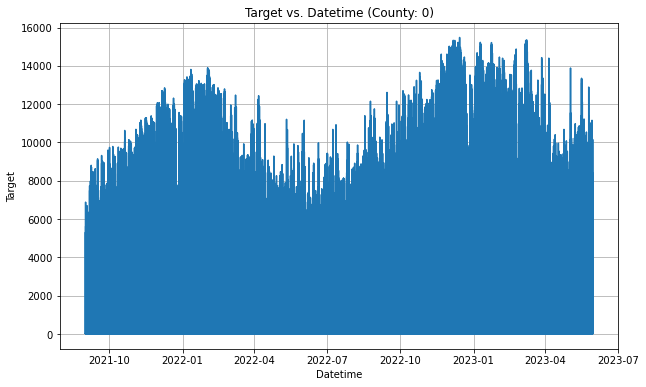

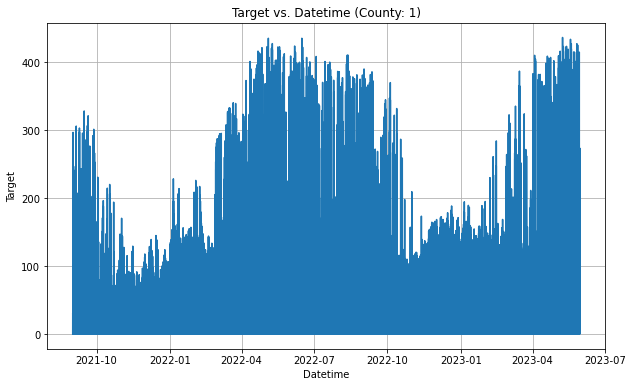

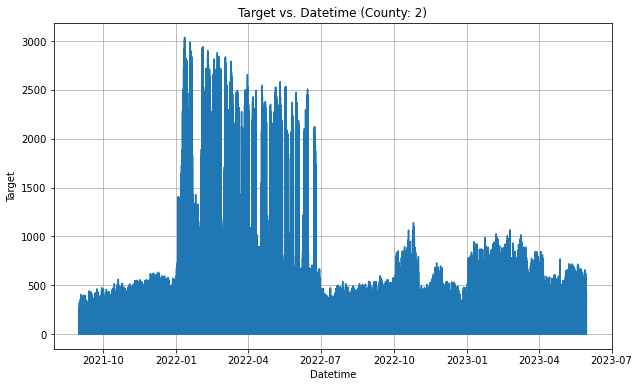

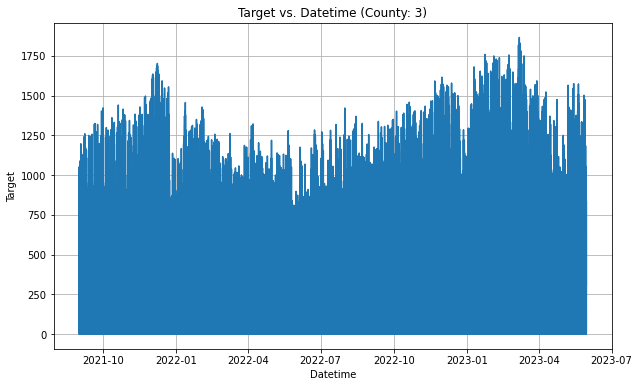

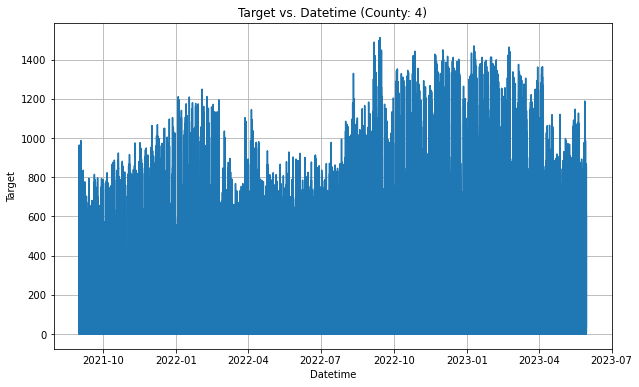

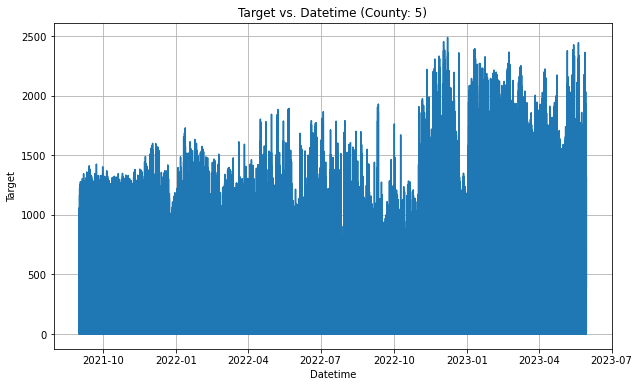

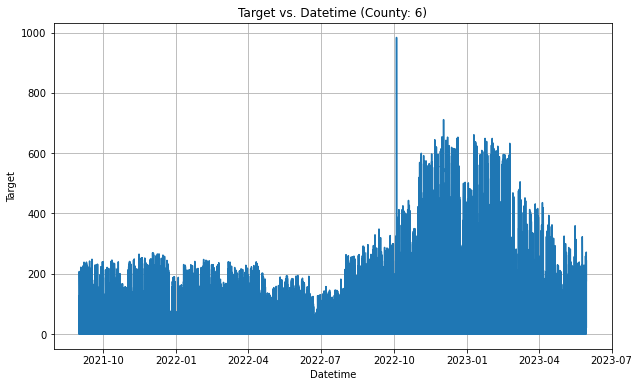

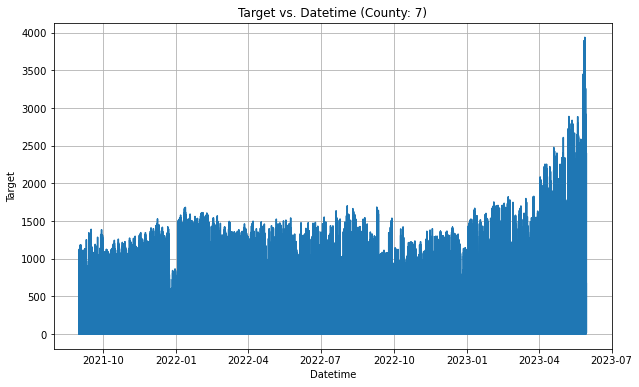

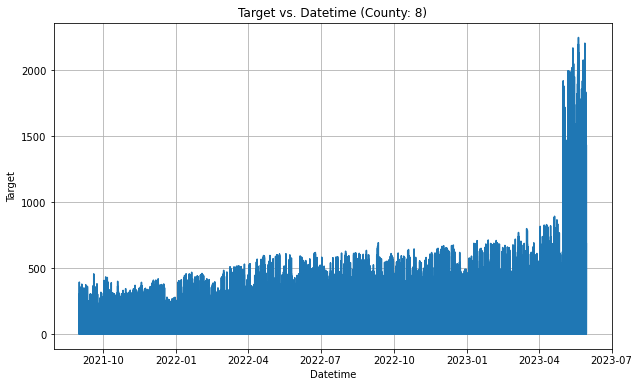

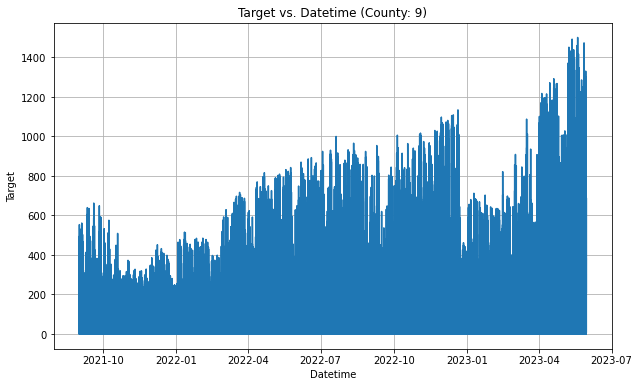

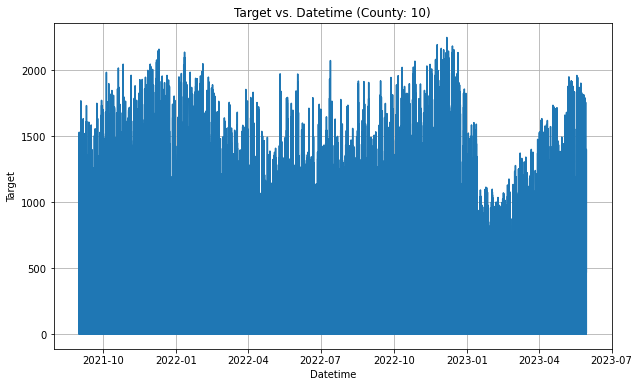

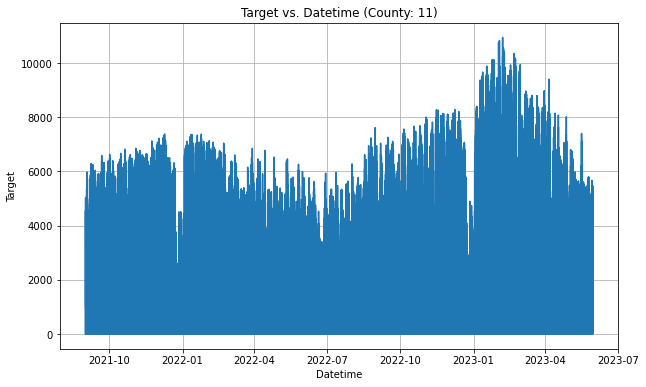

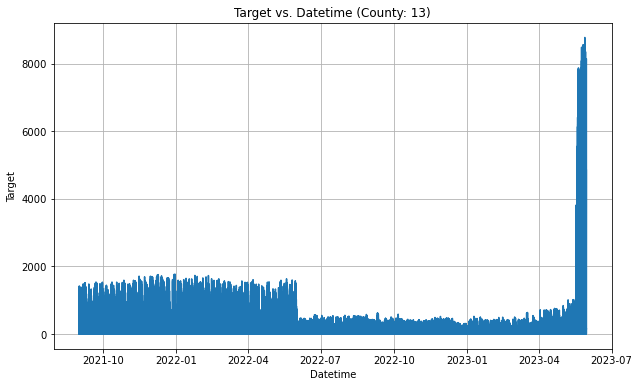

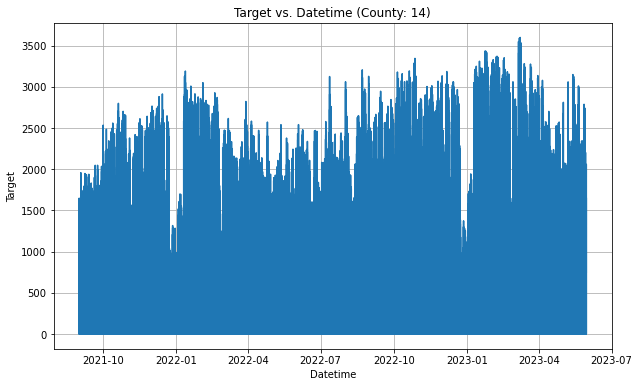

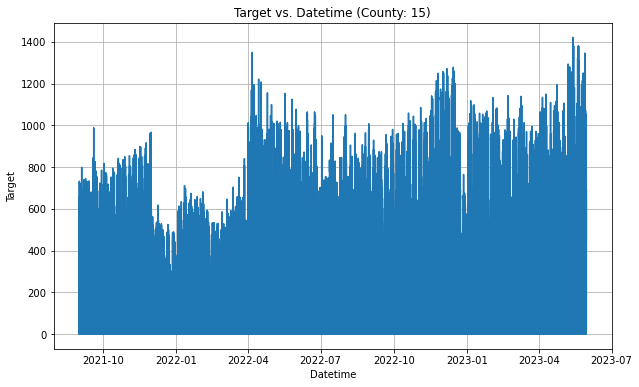

In [32]:
# visualize the target for different counties
# Assuming your DataFrame is named 'df'
for county in df['county'].unique():
  # Filter data for the current county
  county_data = df.loc[df['county'] == county]

  # Plot target vs datetime
  plt.figure(figsize=(10, 6))
  plt.plot(county_data['datetime'], county_data['target'])
  plt.xlabel('Datetime')
  plt.ylabel('Target')
  plt.title(f'Target vs. Datetime (County: {county})')
  plt.grid(True)
  plt.show()

County No. = 0


C:\Users\hbalu\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


County No. = 1
County No. = 2
County No. = 3


C:\Users\hbalu\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\hbalu\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\hbalu\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


County No. = 4


C:\Users\hbalu\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


County No. = 5


C:\Users\hbalu\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


County No. = 6
County No. = 7


C:\Users\hbalu\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\hbalu\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


County No. = 8
County No. = 9
County No. = 10


C:\Users\hbalu\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\hbalu\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\hbalu\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


County No. = 11


C:\Users\hbalu\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


County No. = 13
County No. = 14
County No. = 15


C:\Users\hbalu\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\hbalu\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\hbalu\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


IndexError: index 15 is out of bounds for axis 0 with size 15

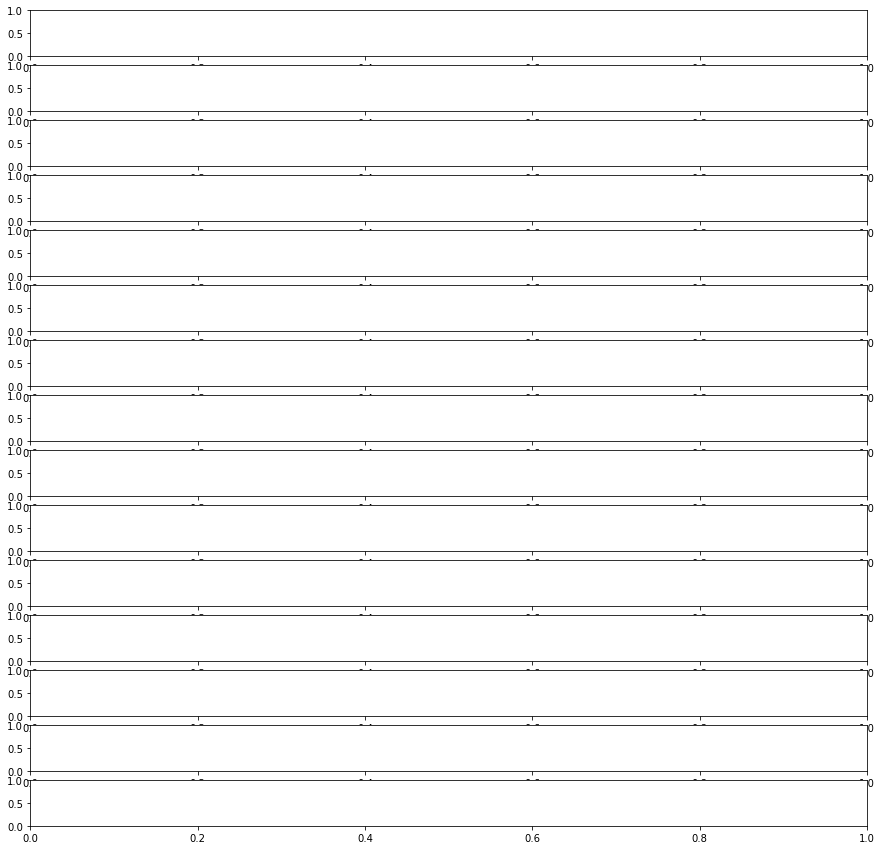

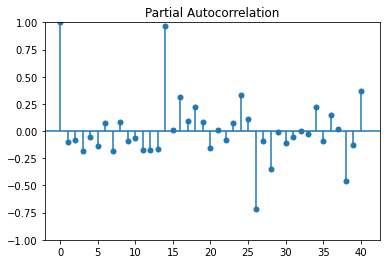

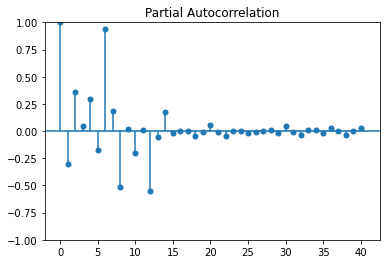

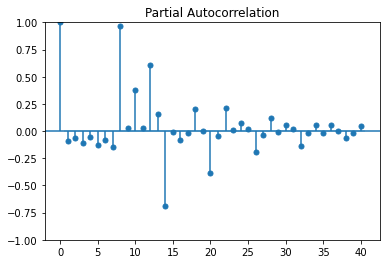

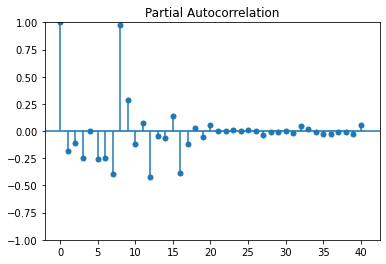

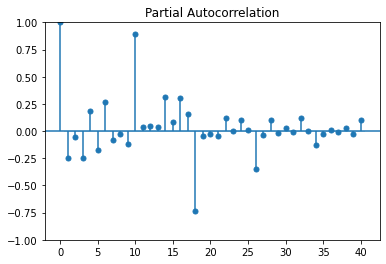

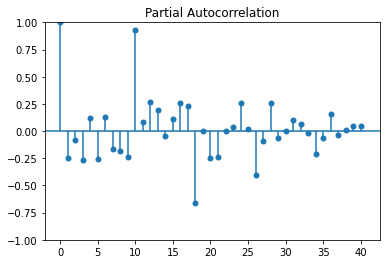

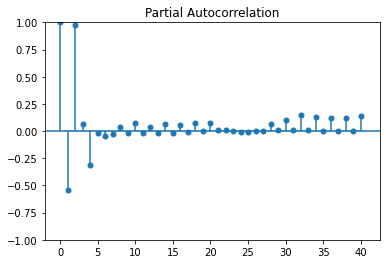

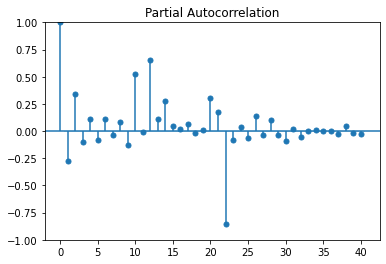

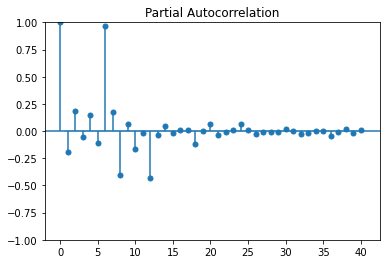

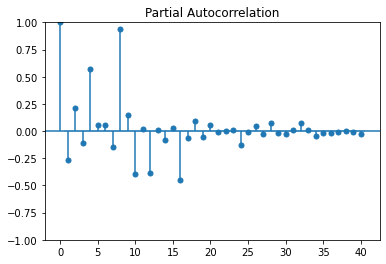

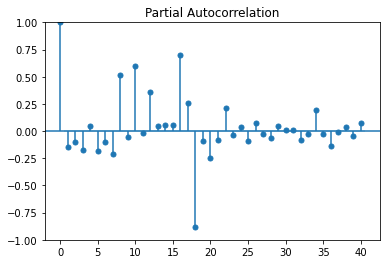

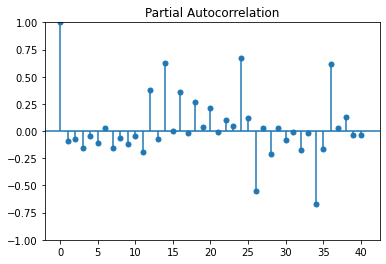

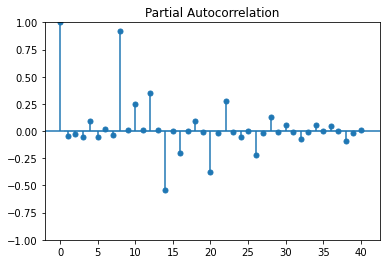

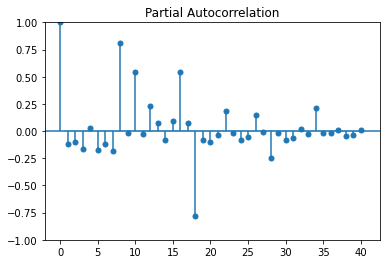

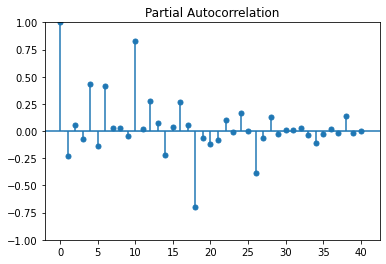

In [63]:
# subplots

fig, ax = plt.subplots(15,1, figsize = (15,15))

for i in range(0, 16):
    if i == 12:
        continue
    print(f"County No. = {i}")
    ax[i] =plot_pacf(county_data[i]['target'], lags = 40)


In [64]:
# key : county no
# value : lags (in days) for the corresponding county no

lags = {
    0 : [14, 26, 28, 38],
    1 : [3, 6, 8, 11],
    2 : [8, 10, 12, 14, 20],
    3 : [7, 8 , 12, 16],
    4 : [10, 18, 26],
    5 : [10, 18, 26],
    6 : [1, 2, 4],
    7 : [10, 12, 27],
    8 : [6, 8, 12],
    9 : [4, 8, 10, 12, 16],
    10 : [8, 10, 12, 16, 18],
    11 : [14, 24, 26, 34, 36], 
    13 : [8, 12, 14, 20],
    14 : [8, 10, 16, 18],
    15 : [4, 6, 10, 18, 26]
}

## Creating the new lags columns for each county

In [69]:
def add_lagged_features(county_data, lags_dict):
  """
  Adds lagged target columns to each county DataFrame in the dictionary based on the lags dictionary.

  Args:
      county_data (dict): A dictionary mapping county numbers to DataFrames.
      lags_dict (dict): A dictionary mapping county numbers to lists of lags.

  Returns:
      dict: A dictionary with the same structure as county_data, but with lagged target columns added to each DataFrame.
  """
  for county, df in county_data.items():
    lag_values = lags_dict.get(county, [])  # Get lags for the current county (handle missing keys)
    for lag in lag_values:
      # Construct the new column name
      new_col_name = f"{lag}_days_ago"
      # Shift target values by the lag and add as a new column (handle potential out-of-bounds)
      df[new_col_name] = df['target'].shift(lag).fillna(method='ffill')  # Forward fill for missing values
  return county_data

# Apply the function to your county_data
county_data = add_lagged_features(county_data.copy(), lags)  # Use a copy to avoid modifying original data

# Access data for a specific county (optional)
# county_data['desired_county_name']  # Replace 'desired_county_name' with the actual county name

C:\Users\hbalu\AppData\Local\Temp\ipykernel_11300\3073705019.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_col_name] = df['target'].shift(lag).fillna(method='ffill')  # Forward fill for missing values


county_data is the dictionary which contains key value pairs.<br>
key : county no <br>
value : corresponding df <br>

## Save the data : county_data

In [72]:
'''
Since county_data contains DataFrames, using pickle is the recommended approach.
It can effectively serialize and deserialize complex data structures,
allowing you to save and load the dictionary with its DataFrames intact.
'''
# import pickle

# # Assuming county_data is the dictionary you want to save
# with open('../output data/county_data.pkl', 'wb') as f:
#   pickle.dump(county_data, f)